# Exercise on missing data imputation

In [35]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


## A) Load and frame data

**Data description**: 	A driver uses an app to track GPS coordinates as he drives to work and back each day. The app collects the location and elevation data. Data for about 200 trips are summarized in this data set.
You may see more info [here](https://openmv.net/info/travel-times).


1. Read the csv file from https://openmv.net/file/travel-times.csv.
2. Format each column using appropriate types.
3. Merge the first two columns to have a datetime index.
4. Encode all categorical fields into integers.
5. Identify columns with missing data. Print a table showing the count and ratio of missing values for each column.
6. We will not need the column `Comments` for the remainder of the notebook, so you may drop it at you convenience.

In [36]:
# TODO your code here
data = pd.read_csv(
    'https://openmv.net/file/travel-times.csv',
...
)

...


,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All
Date_StartTime,,,,,,,,,,
2012-01-06 16:37:00,4,1,51.29,127.4,78.3,84.8,NaN,39.3,36.3,0
2012-01-06 08:20:00,4,0,51.63,130.3,81.8,88.9,NaN,37.9,34.9,0
2012-01-04 16:17:00,2,1,51.27,127.4,82.0,85.8,NaN,37.5,35.9,0
2012-01-04 07:53:00,2,0,49.17,132.3,74.2,82.9,NaN,39.8,35.6,0
2012-01-03 18:57:00,1,1,51.15,136.2,83.4,88.1,NaN,36.8,34.8,0
...,...,...,...,...,...,...,...,...,...,...
2011-07-18 08:09:00,0,0,54.52,125.6,49.9,82.4,7.89,65.5,39.7,0
2011-07-14 08:03:00,3,0,50.90,123.7,76.2,95.1,7.89,40.1,32.1,1
2011-07-13 17:08:00,2,1,51.96,132.6,57.5,76.7,NaN,54.2,40.6,1


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2012-01-06 16:37:00 to 2011-07-11 16:56:00
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DayOfWeek       205 non-null    int32  
 1   GoingTo         205 non-null    int32  
 2   Distance        205 non-null    float64
 3   MaxSpeed        205 non-null    float64
 4   AvgSpeed        205 non-null    float64
 5   AvgMovingSpeed  205 non-null    float64
 6   FuelEconomy     186 non-null    float64
 7   TotalTime       205 non-null    float64
 8   MovingTime      205 non-null    float64
 9   Take407All      205 non-null    int32  
dtypes: float64(7), int32(3)
memory usage: 15.2 KB


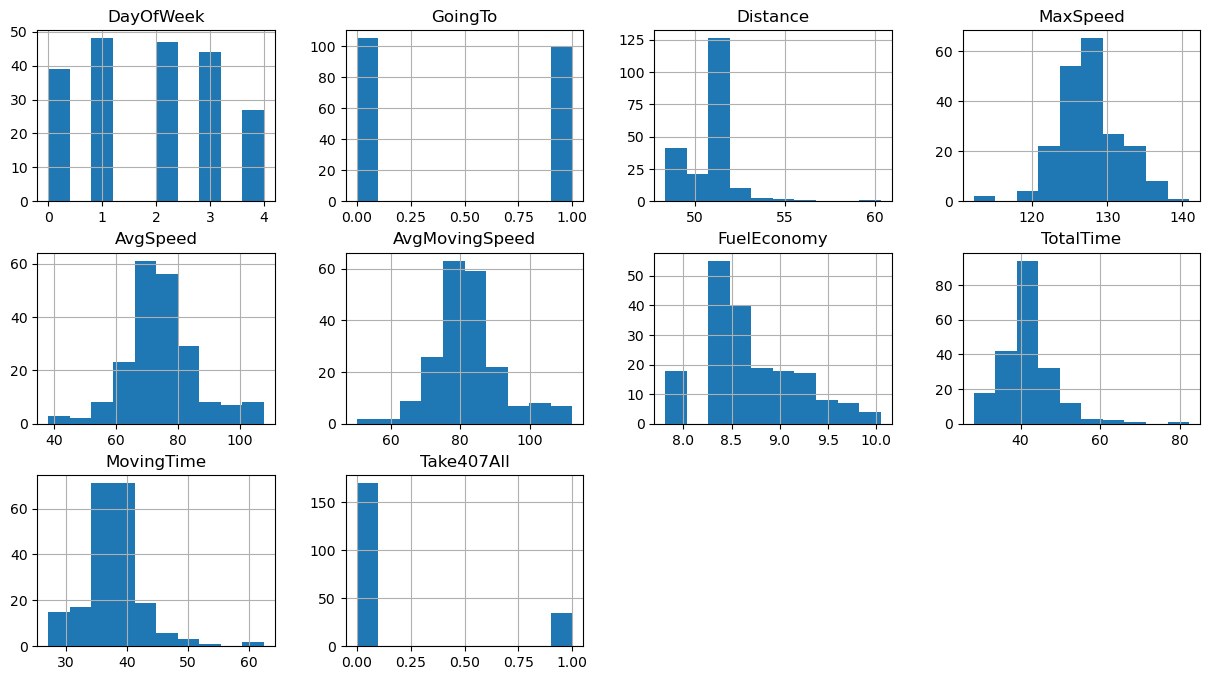

In [38]:
data.hist(figsize=(15,8), layout=(3, 4));

### Count and ratio of missing samples on each column

In [39]:
# TODO your code here


DayOfWeek          0
GoingTo            0
Distance           0
MaxSpeed           0
AvgSpeed           0
AvgMovingSpeed     0
FuelEconomy       19
TotalTime          0
MovingTime         0
Take407All         0
dtype: int64

In [55]:
# TODO your code here


DayOfWeek         0.000000
GoingTo           0.000000
Distance          0.000000
MaxSpeed          0.000000
AvgSpeed          0.000000
AvgMovingSpeed    0.000000
FuelEconomy       0.092683
TotalTime         0.000000
MovingTime        0.000000
Take407All        0.000000
dtype: float64

## B) Is the missingness MCAR?

When we have only one variable with missing values (here `FuelEconomy`), one way of checking for MCAR is to separate the rows in two sets depending on wether `FuelEconomy` was observed or missing. The we apply a statistical test to check if each variable has the same distribution in both sets.

1. Create a NA mask based on the missingness in the column `FuelEconomy`.
2. Split the data in `data_miss` and `data_obs` based on this mask[
3. For each column, compare the distributions in both sets using a statistical test ([like Student's t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind) if you can assume normal distribution, or[ Mann-Whitney U](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu) for a non-parametric option). 
    - Tip: you have functions to calculate these statistics and their associated p-values in the package `scipy.stats`.



If the test shows no significant difference between samples in both sets, you may more comfortably accept an MCAR hypothesis. Conversely, a variable bearing significant difference is likely linked to the missingness mechanism, motivating us to move to a conditional MAR hypothesis.


In [40]:
# TODO your code here
na_mask = ...
data_miss = ...
data_obs = ...

In [41]:
# TODO your code here
# Apply the test

...


,statistic,pvalue
DayOfWeek,1479.5,0.233387
GoingTo,1944.5,0.406525
Distance,2278.5,0.038005
MaxSpeed,1830.5,0.798103
AvgSpeed,1830.5,0.798117
AvgMovingSpeed,2052.0,0.248047
TotalTime,1739.0,0.911095
MovingTime,1540.0,0.357748
Take407All,1742.0,0.878696


**QUESTION: What do you conclude from the comparison of `data_miss` and `data_obs`?**

>*Your answer here*

## C) MAR dependencies

At 95% CI, you have observed a difference in the distribution of one of the variables, following the missingnes of `FuelEconomy`. 
Another form of seeing how variables interfere in the missingness pattern is to compute the correlation between them and the `na_mask`.

<Axes: >

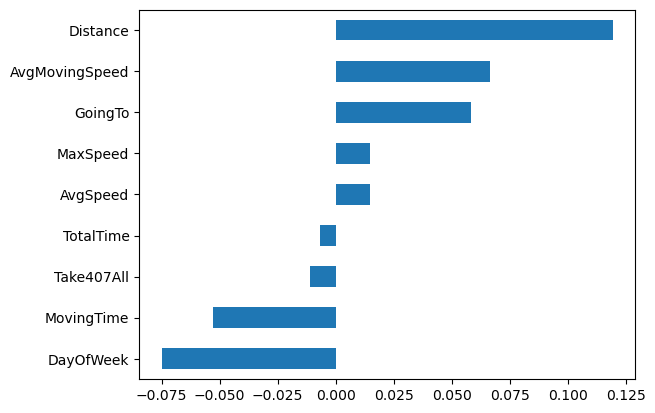

In [42]:
(data.drop('FuelEconomy', axis=1)
 .corrwith(na_mask, method='kendall')
 .sort_values().plot(kind='barh')
 )

**TODO** Pandas's correlation functions do not output p-values.  In the next cell, recompute the correlations using scipy so that you can see p-values. We'll give preference to [Kendal-Tau correlation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html) as it is non-parametric.


In [43]:
# TODO your code here


,statistic,pvalue
Distance,0.119380,0.037818
AvgMovingSpeed,0.066435,0.247216
GoingTo,0.058277,0.405201
MaxSpeed,0.014831,0.796536
AvgSpeed,0.014795,0.796549
TotalTime,-0.006535,0.909485
Take407All,-0.010904,0.876240
MovingTime,-0.053014,0.356687
DayOfWeek,-0.074930,0.232574



**Question: are there any other variables significantly correlated with the missingness in `FuelEconomy`?** 

>*Your answer here*

## D) Simple imputer

We have established missingness to be MAR. A simple iputation method using a constant is thus not the most recommended method. For the sake of the exercise, in this section you will use [`sklearn`'s `SimpleImputer`](https://scikit-learn.org/stable/modules/impute.html#univariate-feature-imputation) to impute with the median. Keep the output imputed data in a separate dataframe.

In [44]:
# TODO your code here

# NOTE sklearn returns a numpy array. You should reformat its output as a dataframe with the same index and columns as before.
data_simp = pd.DataFrame(
    # TODO complete the line bellow
    ...,
    index=data.index,
    columns=data.columns
)
data_simp['FuelEconomy']

Date_StartTime
2012-01-06 16:37:00    8.52
2012-01-06 08:20:00    8.52
2012-01-04 16:17:00    8.52
2012-01-04 07:53:00    8.52
2012-01-03 18:57:00    8.52
                       ... 
2011-07-18 08:09:00    7.89
2011-07-14 08:03:00    7.89
2011-07-13 17:08:00    8.52
2011-07-12 17:51:00    8.52
2011-07-11 16:56:00    8.52
Name: FuelEconomy, Length: 205, dtype: float64

Observe the effect of median imputation in the relationship between `FuelEconomy` and `Distance`:

<Axes: xlabel='Distance', ylabel='FuelEconomy'>

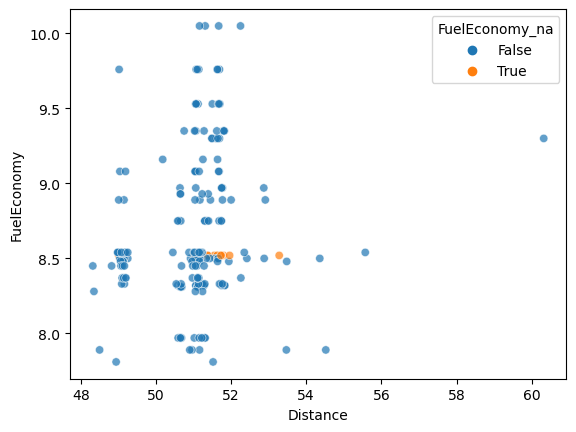

In [45]:
plt.figure()
# TODO set data kwarg to be the imputed dataframe you have just generated
sns.scatterplot(data=data_simp, x='Distance', y='FuelEconomy', 
            hue=na_mask, alpha=0.7)

## E) Iterative imputer w/ linear model 

With MAR data, stochastic regression is a better imputation alternative. 
Here you need to decide:
1. which variables are going to participate in the regression;
2. which model you are going to use (linear or something else)


In this exercise, we'll use a linear model (namely a [Bayesian Ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression), the default model proposed by `sklearn`'s `IterativeImpute`.)
We will inlcude `Distance` in the modeling since it seems to be the only factor conditioning the MAR mechanism. In the case of a linear model, Other variables might be significantly correlated.



**TODO** Check the correlation between observed values in `FuelEconomy` and other columns. Select variables  with significant correlation to be part of the model

In [46]:
# Compute correlation and p-values
# TODO your code here


,statistic,pvalue
MovingTime,0.162571,0.001354
Distance,0.158170,0.001813
TotalTime,0.143649,0.004604
DayOfWeek,0.010826,0.844849
GoingTo,0.002948,0.961870
MaxSpeed,-0.025517,0.614992
AvgSpeed,-0.101346,0.045261
AvgMovingSpeed,-0.134940,0.007709
Take407All,-0.298042,0.000001


In [47]:
# Select significant variables
# TODO your code here

['Distance',
 'AvgSpeed',
 'AvgMovingSpeed',
 'TotalTime',
 'MovingTime',
 'Take407All',
 'FuelEconomy']

### Applying `IterativeImputer`

`IterativeImputer` can be used to perform stochastic regression. Complete the code bellow in order to impute `FuelEconomy` missing values. Keep the imputed data as a separate dataframe for later comparisons.

**NOTE** Fix a random state on the `IterativeImputer` object so you can reproduce the results. Change the random state to see how different values get imputet each time.

In [48]:
# TODO select only the columns you deemed significant and save them in data_ref
data_ref = ...

# TODO use data_ref to fit the imputation model and impute the missing values in FuelEconomy.
# TODO your code here


# NOTE sklearn returns a numpy array. You should reformat its output as a dataframe with the same index and columns as before.
data_brimp = pd.DataFrame(
        # TODO complete the line bellow
    ...,
    index=data_ref.index,
    columns=data_ref.columns
    )

data_brimp['FuelEconomy']

Date_StartTime
2012-01-06 16:37:00    8.682796
2012-01-06 08:20:00    8.639282
2012-01-04 16:17:00    8.723891
2012-01-04 07:53:00    8.557418
2012-01-03 18:57:00    8.668758
                         ...   
2011-07-18 08:09:00    7.890000
2011-07-14 08:03:00    7.890000
2011-07-13 17:08:00    8.495371
2011-07-12 17:51:00    8.293236
2011-07-11 16:56:00    8.103337
Name: FuelEconomy, Length: 205, dtype: float64

Observe the effect of this imputation in the relationship between `FuelEconomy` and `Distance`.


**QUESTION: what is the main difference observed with respect to the median imputation method?**

>*Your answer here*

<Axes: xlabel='Distance', ylabel='FuelEconomy'>

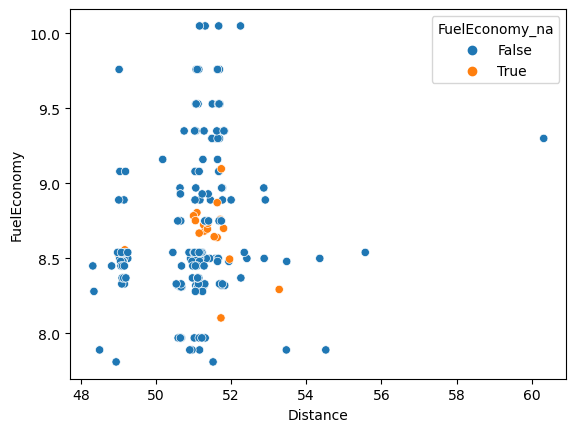

In [49]:
plt.figure()
sns.scatterplot(data=data_brimp, x='Distance', y='FuelEconomy', hue=na_mask)

## F) Iterative imputer w/ non-linear model
In this exercise, we'll use again `IterativeImputer`, but this time with a non-linear model ([`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)). In this model we'll include all columns of the dataframe. Keep the imputed data as a separate dataframe for later comparisons.

In [50]:
# TODO use data to fit the imputation model and impute the missing values in FuelEconomy.

# NOTE sklearn returns a numpy array. You should reformat its output as a dataframe with the same index and columns as before.
data_rfimp = pd.DataFrame(
    # TODO complete the line bellow
    ...,
    index=data.index,
    columns=data.columns
    )
data_rfimp['FuelEconomy']

Date_StartTime
2012-01-06 16:37:00    8.6426
2012-01-06 08:20:00    8.9670
2012-01-04 16:17:00    8.7271
2012-01-04 07:53:00    8.5864
2012-01-03 18:57:00    8.4151
                        ...  
2011-07-18 08:09:00    7.8900
2011-07-14 08:03:00    7.8900
2011-07-13 17:08:00    8.4507
2011-07-12 17:51:00    8.3771
2011-07-11 16:56:00    8.4483
Name: FuelEconomy, Length: 205, dtype: float64

Observe the effect of this imputation in the relationship between `FuelEconomy` and `Distance`.

<Axes: xlabel='Distance', ylabel='FuelEconomy'>

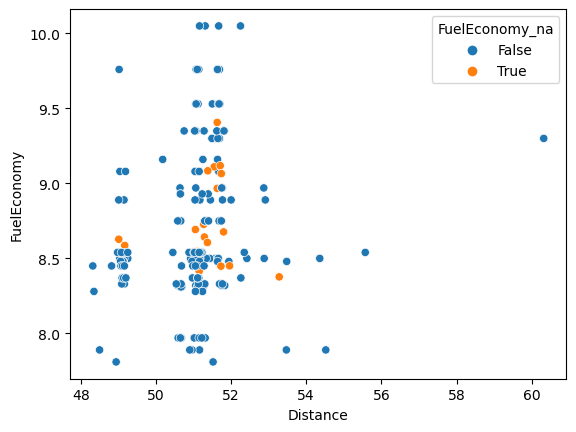

In [51]:
plt.figure()
sns.scatterplot(data=data_rfimp, x='Distance', y='FuelEconomy', hue=na_mask)

## G) Compare
Complete the dataframe bellow with the several imputed `FuelEconomy` series you have obtained in exercises D, E and F. The first column in the dataframe is the original data with NA, and will be used to compute statistics in a pairwise fashion (i.e. available case analysis, ACA).

We'll compare some of their statistics to see how different imputations can affect them.


,Ignore NA (ACA),MedianImpute,IterativeImpute BR,IterativeImpute RF
count,186.000000,205.000000,205.000000,205.000000
mean,8.690591,8.674780,8.687729,8.695329
std,0.504971,0.483431,0.485053,0.488962
min,7.810000,7.810000,7.810000,7.810000
25%,8.370000,8.370000,8.370000,8.370000
50%,8.520000,8.520000,8.540000,8.540000
75%,8.970000,8.930000,8.930000,8.970000
max,10.050000,10.050000,10.050000,10.050000


Text(0.5, 1.0, 'Distribution of FuelEconomy')

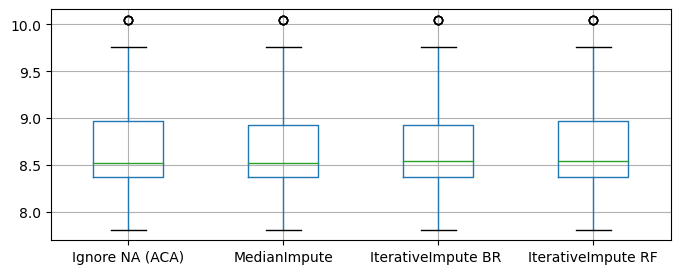

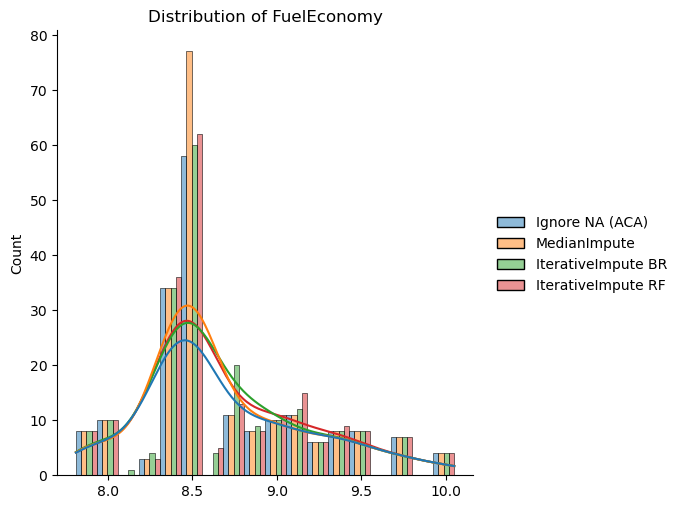

In [54]:
# TODO complete the dataframe bellow

df = pd.DataFrame({
    'Ignore NA (ACA)': data['FuelEconomy'],
    'MedianImpute': data_simp['FuelEconomy'],
    'IterativeImpute BR ': data_brimp['FuelEconomy'],
    'IterativeImpute RF': data_rfimp['FuelEconomy'],
    'imputed': na_mask},
    index=data.index
    )
# Now we display tables, boxplots and histograms
display(df.describe())
df.drop('imputed', axis=1).boxplot(figsize=(8,3))

sns.displot(df.drop('imputed', axis=1), kde=True, multiple='dodge')
plt.title('Distribution of FuelEconomy')

Text(0.5, 1.0, 'Kendall Correlation between FuelEconomy and other columns')

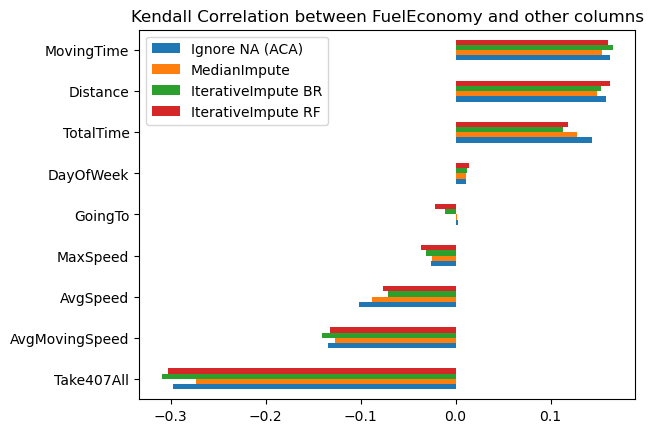

In [53]:
df = pd.DataFrame({
    'Ignore NA (ACA)': (
        data.corr(method='kendall')['FuelEconomy']
        .drop(index=['FuelEconomy'])
            .sort_values()
    ),
    'MedianImpute': (
        data.corrwith(data_simp['FuelEconomy'], method='kendall')
        .drop('FuelEconomy', axis=0)
    ),
    'IterativeImpute BR': (
        data.corrwith(data_brimp['FuelEconomy'], method='kendall')
        .drop('FuelEconomy', axis=0)
    ),
    'IterativeImpute RF': (
        data.corrwith(data_rfimp['FuelEconomy'], method='kendall')
        .drop('FuelEconomy', axis=0)
    )
})
df.sort_values(by='Ignore NA (ACA)').plot.barh()
plt.title('Kendall Correlation between FuelEconomy and other columns')


**OPEN QUESTION** Discuss the comparative plots obtained above.

>*Discussion here*